In [145]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import matplotlib.image as mpig
from keras_preprocessing.image import ImageDataGenerator

In [146]:
train_path = r'D:\PRAKTIKUM\Praktikum KB\PA1\train'
val_path = r'D:\PRAKTIKUM\Praktikum KB\PA1\val'

In [147]:
train_datagen = ImageDataGenerator( #datagen training
    rescale=1./255,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    rotation_range=30,
    validation_split = 0.2
)

val_datagen = ImageDataGenerator( #datagen validasi
    rescale=1./255
)

In [148]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150,300),
    batch_size=8,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(150,300),
    batch_size=2,
    class_mode='categorical',
    shuffle=True
)

Found 1565 images belonging to 5 classes.
Found 313 images belonging to 5 classes.


In [149]:
image, label = val_generator.next()

In [150]:
labels_name = ['anjing', 'ayam', 'kucing', 'kuda', 'sapi']

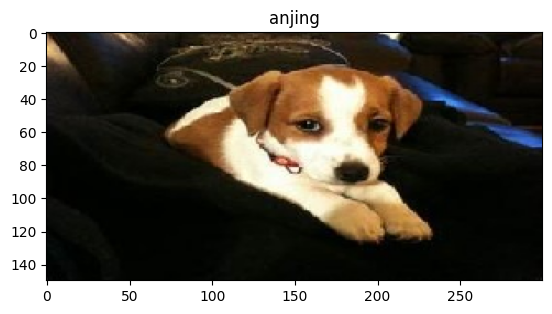

In [151]:
plt.title(labels_name[tf.argmax(label[0])])
plt.imshow(image[0])

In [152]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (2,4), activation='relu', input_shape=(150,300, 3)),
    tf.keras.layers.MaxPool2D(1, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(labels_name), activation='softmax')
    ])

In [153]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 149, 297, 32)      800       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 149, 32)      0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 357600)            0         
                                                                 
 dense_8 (Dense)             (None, 64)                22886464  
                                                                 
 dense_9 (Dense)             (None, 5)                 325       
                                                                 
Total params: 22,887,589
Trainable params: 22,887,589
Non-trainable params: 0
__________________________________________

In [154]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [156]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data= val_generator,
)

Epoch 1/20
196/196 [==============================] - 39s 200ms/step - loss: 1.7082 - accuracy: 0.3048 - val_loss: 1.4852 - val_accuracy: 0.3482
Epoch 2/20
196/196 [==============================] - 39s 199ms/step - loss: 1.3855 - accuracy: 0.4224 - val_loss: 1.3073 - val_accuracy: 0.4409
Epoch 3/20
196/196 [==============================] - 39s 199ms/step - loss: 1.2567 - accuracy: 0.4805 - val_loss: 1.0984 - val_accuracy: 0.5240
Epoch 4/20
196/196 [==============================] - 39s 200ms/step - loss: 1.1614 - accuracy: 0.5323 - val_loss: 0.9963 - val_accuracy: 0.6166
Epoch 5/20
196/196 [==============================] - 39s 200ms/step - loss: 1.1053 - accuracy: 0.5578 - val_loss: 1.2581 - val_accuracy: 0.4792
Epoch 6/20
196/196 [==============================] - 39s 200ms/step - loss: 1.0915 - accuracy: 0.5853 - val_loss: 0.8746 - val_accuracy: 0.6422
Epoch 7/20
196/196 [==============================] - 39s 200ms/step - loss: 1.0658 - accuracy: 0.5885 - val_loss: 1.0247 - val_ac